# Boundary conditions and load cases examples

Thanks the Bardell equations implamentation, composipy is capable of simulating different boundary conditions and different combinations of load cases.



## Importing composipy objects and creating properties

In [91]:
from composipy import OrthotropicMaterial, LaminateProperty
from composipy import PlateStructure

In [92]:
#Ply Material Properties (MPa and mm)
E1 = 60800
E2 = 58250
v12 = 0.07
G12 = 4550
t = 0.21

# Plate Parameters (mm)
a = 360.
b = 360.
m = 10 # discretization in x direction
n = 10 # discretization in y direction


# Stacking sequence
stacking = [45,-45,0,90,45,-45,0,90,45,-45]
stacking += stacking[::-1] # symmetry

In [93]:
# Ply material and laminate property objects

ply_1 = OrthotropicMaterial(E1, E2, v12, G12, t)
l1 = LaminateProperty(stacking, ply_1)

## Pinned Nxx

In [94]:
panel_SSSS = PlateStructure(l1, a, b, m=m, n=n, Nxx=-1, Nyy=-1, constraints='PINNED')

In [95]:
eigvals, eigvecs = panel_SSSS.buckling_analysis()

In [96]:
eigvals

array([ 48.52457849, 115.33986497, 115.6071133 , 194.09686866,
       221.57771299])

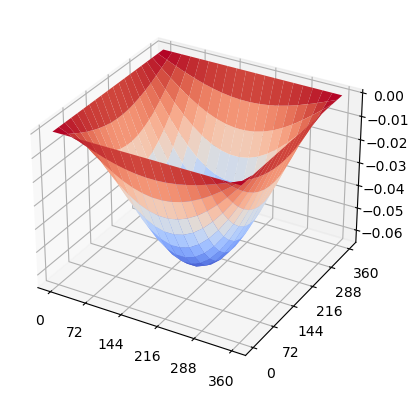

In [97]:
panel_SSSS.plot_eigenvalue()

## Clamped

In [98]:
panel_CCCC = PlateStructure(l1, a, b, m=m, n=n, Nxx=-1, Nyy=-1, constraints='CLAMPED')

In [99]:
panel_CCCC.buckling_analysis()

(array([119.7607275 , 208.58419158, 209.07659814, 303.60726604,
        341.34717468]),
 array([[ 3.35923716e-15, -6.42153769e-15,  1.42076370e-14,
         -3.79367751e-15,  5.36898652e-15],
        [-2.85289164e-14,  3.32153826e-14, -5.09832535e-14,
          3.18021055e-14, -4.47186768e-14],
        [-1.72066602e-14,  1.74134902e-14, -2.16552401e-14,
          1.94116857e-14, -2.74107183e-14],
        ...,
        [-3.22090082e-03,  5.75058502e-13,  2.73862262e-12,
         -4.68025586e-01, -4.70728564e-04],
        [ 4.43739988e-14, -3.92222854e-02,  1.40980836e-01,
         -2.19084896e-12, -3.13036279e-13],
        [-2.03480573e-03,  4.32255410e-13,  1.58180270e-12,
         -2.64378503e-01, -1.11273224e-04]]))

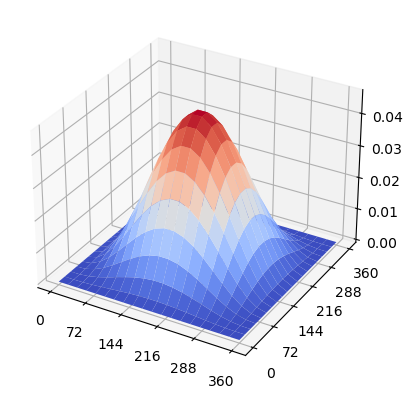

In [100]:
panel_CCCC.plot_eigenvalue()

## Free edge (custom)

In [101]:
constraints={
                'x0': ['TX', 'TY', 'TZ'],
                'xa': ['TX', 'TY', 'TZ'],
                'y0': [],
                'yb': ['TX', 'TY', 'TZ'],
            }
panel_SSFS = PlateStructure(l1, a, b, m=m, n=n, Nxx=-1, Nyy=-1, constraints=constraints)

In [102]:
panel_SSFS.buckling_analysis()

(array([ 23.40938145,  52.72161643,  83.87451521, 116.60239971,
        129.43640491]),
 array([[ 6.88927624e-15, -1.26219324e-15,  4.51543082e-14,
          2.97189182e-15,  6.01814005e-15],
        [-5.09578139e-13,  1.65546553e-13, -3.93283031e-12,
         -2.26129236e-13, -1.13142954e-12],
        [ 1.76973074e-13, -2.57444241e-14,  2.61736770e-12,
         -1.12798446e-13,  1.53350842e-12],
        ...,
        [-3.21089912e-03,  2.27753911e-03,  6.89706210e-05,
          3.70497285e-03,  1.71246773e-05],
        [-8.37562161e-04,  1.38161171e-03, -3.39188302e-05,
          1.20803021e-03,  3.41775524e-05],
        [-1.92852657e-03,  1.01945677e-03,  4.52673342e-05,
          2.12548761e-03,  7.19759146e-06]]))

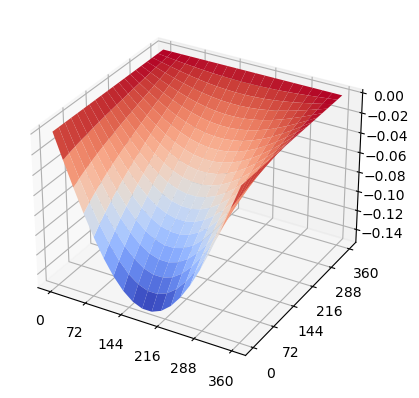

In [103]:
panel_SSFS.plot_eigenvalue()

## Nxy Loading

In [104]:
panel_CCCC_nxy = PlateStructure(l1, a, b, m=m, n=n, Nxy=-1, constraints='CLAMPED')

In [105]:
panel_CCCC_nxy.buckling_analysis()

(array([338.84283307, 389.26571459, 776.82143838, 824.28455938,
        882.94931083]),
 array([[ 4.21687899e-15,  5.04021668e-15, -4.23474575e-15,
          1.80661504e-15,  2.17747578e-14],
        [ 1.21824839e-14,  2.96625504e-14,  3.97731548e-14,
         -2.43295327e-14,  1.02438256e-15],
        [-2.57465496e-14, -1.74582847e-13,  2.56317250e-14,
          1.73599082e-14, -7.33052076e-15],
        ...,
        [ 5.84301288e-01,  4.02074207e-13,  3.22800174e-01,
         -8.64033671e-13,  2.94614222e-12],
        [-1.38814611e-12,  1.01135119e-01,  9.38964184e-13,
         -1.79699680e-01, -3.68197373e-01],
        [ 3.89453084e-01,  6.26590793e-13,  2.20302574e-01,
          2.45429369e-12,  5.49885594e-13]]))

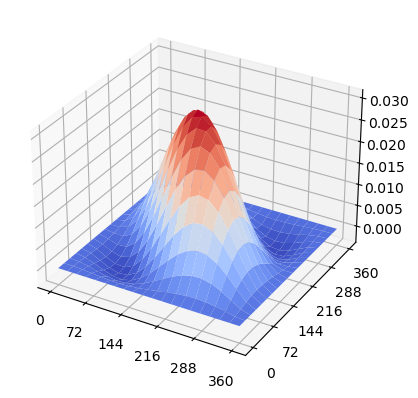

In [106]:
panel_CCCC_nxy.plot_eigenvalue()

## Nxx+Nyy biaxial Loading

In [107]:
panel_SSSS_biaxial = PlateStructure(l1, a, b, m=m, n=n, Nxx=-3, Nyy=-1, constraints='PINNED')

In [108]:
panel_SSSS_biaxial.buckling_analysis()

(array([24.26228924, 44.45453743, 79.34094617, 82.40365389, 97.0492609 ]),
 array([[ 2.40356272e-13, -6.61091645e-13,  4.28438736e-13,
         -5.42418298e-13,  3.36429896e-13],
        [ 5.26035497e-13,  9.63048564e-14, -1.78153944e-13,
          2.77892036e-13,  1.45641269e-13],
        [ 3.62361641e-13,  9.49039296e-13, -7.36910919e-13,
          1.02096060e-12, -2.38640938e-13],
        ...,
        [-8.16193747e-03,  8.94279739e-12, -5.24570975e-03,
          7.08589503e-12, -4.45475548e-05],
        [-1.33359640e-12,  1.62943703e-05,  3.02024616e-11,
         -3.25462429e-03, -1.86370793e-11],
        [-3.93033075e-03,  5.87051218e-12, -2.56249541e-03,
          3.69797182e-12, -3.53463241e-05]]))

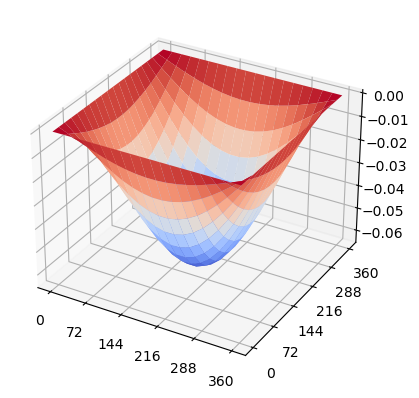

In [109]:
panel_SSSS_biaxial.plot_eigenvalue()